In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/Tecnologie Semantiche')

In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# Read text from a file (*txt_file*).
In the example we used the first chapter from "*Harry Potter and the Prisoner of Azkaban*"

In [4]:
import re

# First chapter from the book
txt_file = "HP_PoA_Ch1.txt"

# First paragraph of the first chapter of the book
# txt_file = "HP_PoA_Ch1_Pr1.txt"

fc = ""
with open(txt_file, "r") as file1:
    FileContent = file1.read()
    fc = FileContent

fc = re.sub(r'\n', ' ', fc)

# Print the read file content
# print("File content:")
# print(fc)

Define the list of characters and places of *Harry Potter and the Prisoner of Azkaban* and the list of people possible title

In [5]:
ch_list = [("Harry", "Potter"), ("Hermione", "Granger"), ("Ron", "Weasley"), 
           ("Sirius", "Black"), ("Remus", "Lupin"), ("Rubeus", "Hagrid"), 
           ("Peter", "Pettigrew"), ("Albus", "Dumbledor"), ("Sybill", "Trelawney"), 
           ("Minerva", "McGonagall"), ("Severus", "Snape"), ("Draco", "Malfoy"),
           ("Lucius", "Malfoy"), ("Ginny", "Weasley"), ("Percy", "Weasley"),
           ("George", "Weasley"), ("Fred", "Weasley"), ("Molly", "Weasley"),
           ("Arthur", "Weasley"), ("Lily", "Potter"), ("James", "Potter"),
           ("Vernon", "Dursley"), ("Petunia", "Dursley"), ("Dudley", "Dursley"), 
           ("Neville", "Longbottom"), ("Argus", "Filch"), ("Stan", "Shunpike"),
           ("Ernie", "Prang"), ("Cornelius", "Fudge"), ("Oliver", "Wood"),
           ("Cedric", "Diggory"), ("Cho", "Chang"), ("Gregory","Goyle"),
           ("Vincent", "Crabbe"), ("Penelope", "Clearwater"), ("Nearly-Headless", "Nick")]

ch_titles = ["Sir", "Ma'am", "Madam", "Mr", "Mr.", "Mrs", "Mrs.", "Ms", "Ms.", 
             "Miss", "Dr", "Dr.", "Professor"]

places = ["Hogwarts", "Hogsmeade", "Griffindor", "Ravenclaw",
          "Hufflepuff", "Slytherin", "Burrow"]

# Perform *Word Tokenization*

In [7]:
# from nltk.tokenize import sent_tokenize

# Sentences tokenization
# sent_tokenized_txt = sent_tokenize(fc)
# print(sent_tokenized_txt)

from nltk.tokenize import word_tokenize

word_tokenized_txt = word_tokenize(fc)

# Print the word tokenized text
# print("Word Tokenization before stop word removal:")
# print(word_tokenized_txt)

# Perform *Stop Word Removal*

In [7]:
from nltk.corpus import stopwords
from nltk import pos_tag

sw = stopwords.words('english')
sw_pos_tag = pos_tag(sw)

sw_to_remove = []
for word in sw_pos_tag:
  if not re.match("VB.*", word[1]):
    sw_to_remove.append(word[0])

word_tokenized_txt_no_sw = [word for word in word_tokenized_txt if not word in sw_to_remove]

# Print the word tokanized text after stop word removal
# print("Word Tokenization after stop word removal:")
# print(word_tokenized_txt_no_sw)

## Optional: Perform Punctuation Marks Removal

(usually performed if the scope of the analisis is the sentiment analisis)

In [ ]:
import string

# Complete punctuation marks removal
# punctuation = string.punctuation
# print("Punctuation marks:")
# print(punctuation)

# Remove only `` and '' characters
punctuation = ["``", "''"]

word_tokenized_txt_no_sw_punc = [word for word in word_tokenized_txt_no_sw if not word in punctuation]

# Print the word tokanized text after stop word and the punctuation mark removal
# print("Word Tokenization after punctuation mark removal:")
# print(word_tokenized_txt_no_sw_punc)

# Perform *POS Tagging*

In [9]:
from nltk import pos_tag

pos_tag_wt = pos_tag(word_tokenized_txt)

# Print out the newly created tag
# print(pos_tag_wt)

## Perform Tag and Token correction

Correct the mis-taging of words *Hogwarts*, *Hogsmeade*, *Harry*, *Potter, etc.* defined in the above lists, giving them the *NNP* tag

In [10]:
modified_tag = []

for place in places:
  for idx, word in enumerate(pos_tag_wt):
    if word[0].lower() == place.lower():
      modified_tag.append(idx)
      pos_tag_wt[idx] = (word[0], "NNP")

for name in ch_list:
  for idx, word in enumerate(pos_tag_wt):
    if word[0].lower() == name[0].lower() or word[0].lower() == name[1].lower():
      modified_tag.append(idx)
      pos_tag_wt[idx] = (word[0], "NNP")

# Print the modified pairs
# for idx in modified_tag:
#   print(pos_tag_wt[idx])

Perform union of first name and last name as unique token

In [11]:
modified_tag = []

# POS Tagging post correction (e.g. "Harry" and "Potter" as unique tag "Harry Potter")
tmp = pos_tag_wt.copy()
for name in ch_list:
  pos_tag_name_union = []
  for idx, word in enumerate(tmp):
    word_to_append = word
    if word[0].lower() == name[1].lower():
      if tmp[idx-1][0].lower() == name[0].lower() or tmp[idx-1][0].lower() == name[0][0].lower() + "." or tmp[idx-1][0].lower() == name[1][0].lower() + ".":
        pos_tag_name_union.pop()
        word_to_append = (tmp[idx-1][0] + " " + word[0], word[1])
        modified_tag.append("[" + str(tmp[idx-1]) + " and " + str(word) + "] in " + str(word_to_append))

    if len(pos_tag_name_union) == 0:
      pos_tag_name_union.append(word_to_append)

    if pos_tag_name_union[-1] != word_to_append: 
      pos_tag_name_union.append(word_to_append)

  tmp = pos_tag_name_union.copy()

# Print the modified tag
# for x in modified_tag:
#   print(x)
# print("Number of modified tags: " + str(len(modified_tag)))

Perform union of the character name/surname and the title

In [12]:
modified_tag = []

# POS Tagging post correction (e.g. "Professor" and "Snape" as unique tag "Professor Snape")
tmp = pos_tag_name_union.copy()
for name in ch_list:
  pos_tag_title_union = []
  for idx, word in enumerate(tmp):
    word_to_append = word
    if word[0].lower() == name[1].lower() or word[0].lower() == name[0].lower() or word[0].lower() == name[0].lower() + " " + name[1].lower() or name[0][0].lower() + ". " + name[1].lower():
      if tmp[idx-1][0] in ch_titles:
        pos_tag_title_union.pop()
        word_to_append = (tmp[idx-1][0] + " " + word[0], word[1])
        modified_tag.append("[" + str(tmp[idx-1]) + " and " + str(word) + "] in " + str(word_to_append))

    if len(pos_tag_title_union) == 0:
      pos_tag_title_union.append(word_to_append)

    if pos_tag_title_union[-1] != word_to_append: 
      pos_tag_title_union.append(word_to_append)

  tmp = pos_tag_title_union.copy()

# Print the modified tag
# for x in modified_tag:
#   print(x)
# print("Number of modified tags: " + str(len(modified_tag)))

Perform union of the tags *School*, *Witchcraft* and *Wizardry* in the unique tag *School of Witchcraft and Widardry* if they are sequential 

In [13]:
modified_tag = []

pos_tag_f = []
for idx, word in enumerate(pos_tag_title_union):
  word_to_append = word
  if word[0].lower() == "wizardry":
    if pos_tag_title_union[idx-1][0].lower() == "witchcraft" and pos_tag_title_union[idx-2][0].lower() == "school":
      pos_tag_f.pop()
      pos_tag_f.pop()
      word_to_append = (pos_tag_title_union[idx-2][0] + " of " + pos_tag_title_union[idx-1][0] + " and " + word[0], word[1])
      modified_tag.append("[" + str(pos_tag_title_union[idx-2]) + ", " + str(pos_tag_title_union[idx-1]) + " and " + str(word) + "] in " + str(word_to_append))

  pos_tag_f.append(word_to_append)

# Print the modified tag
# for x in modified_tag:
#   print(x)
# print("Number of modified tags: " + str(len(modified_tag)))

Perform union of tag *Privet* and *Drive* in the unique tag *Privet Drive*

In [14]:
modified_tag = []

pos_tag_final = []
for idx, word in enumerate(pos_tag_f):
  word_to_append = word
  if word[0].lower() == "drive":
    if pos_tag_f[idx-1][0].lower() == "privet":
      pos_tag_final.pop()
      word_to_append = (pos_tag_f[idx-1][0] + " " + word[0], word[1])
      modified_tag.append("[" + str(pos_tag_f[idx-1]) + " and " + str(word) + "] in " + str(word_to_append))

  pos_tag_final.append(word_to_append)

# Print the modified tag
# for x in modified_tag:
#   print(x)
# print("Number of modified tags: " + str(len(modified_tag)))

# Perform *Lemmatization*

Convert all the words in their lemma

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(word):
  tag_dict = {
      "J": wordnet.ADJ,
      "N": wordnet.NOUN,
      "V": wordnet.VERB,
      "R": wordnet.ADV}

  if re.search("[jJ][jJ].*", word[1]):
    return tag_dict.get(word[1], wordnet.ADJ)
  if re.search("[nN][nN].*", word[1]):
    return tag_dict.get(word[1], wordnet.NOUN)
  if re.search("[vV][bB].*", word[1]) or re.search("[mM][dD]", word[1]):
    return tag_dict.get(word[1], wordnet.VERB)
  if re.search(".*[rR][bB].*", word[1]):
    return tag_dict.get(word[1], wordnet.ADV)
  return tag_dict.get(word[1], wordnet.NOUN)

In [16]:
lemmatizer = WordNetLemmatizer()

pos_tag_lem = []
for idx, word in enumerate(pos_tag_final):
  pos_tag_lem.append((lemmatizer.lemmatize(word[0], get_wordnet_pos(word)), word[1]))
    
# Print the new pairs
# for x in range(0, len(pos_tag_lem)):
#   print(pos_tag_lem[x], pos_tag_final[x])

# Perform *Noun Phrases Chunking* and Triples Extraction

In [17]:
def get_nl_text_from_np(np):
  np = re.sub("\/NN[A-Z]?[A-Z]?", "", np)
  np = re.sub("\/PRP", "", np)
  np = re.sub("\/DT", "", np)
  np = re.sub("\/JJ[A-Z]?", "", np)
  np = re.sub("\(NP\s*", "", np)
  np = re.sub("\)", "", np)
  np = re.sub("\/RB[A-Z]?", "", np)


  return np

def get_nl_text_from_vp(vp):
  vp = re.sub("\/VB[A-Z]?[A-Z]?", "", vp)
  vp = re.sub("\(VP\s*", "", vp)
  vp = get_nl_text_from_np(vp)

  return vp

In [18]:
from nltk.tree import * 

grammar = '''
NP: {<RB.*>*<DT>?<RB.*>*<JJ.*>*<NN.*><RB.*>* |<RB.*>*<JJ.*>*<PRP><RB.*>*}
VP : {<VB.*>?<RB.*>*<VB.*>*}
          '''

triples = []
triples_nl = []

cp = nltk.RegexpParser(grammar)

np_chunk_result = cp.parse(pos_tag_lem)

for idx, word in enumerate(np_chunk_result):
  if re.match(".*VP\s*.*", repr(word)):
    if re.match(".*NP\s*.*", repr(np_chunk_result[idx-1])) and re.match(".*NP\s*.*", repr(np_chunk_result[idx+1])):
      triples.append(str(np_chunk_result[idx-1]) + " - " + str(word) + " - " + str(np_chunk_result[idx+1]))
      triples_nl.append([get_nl_text_from_np(str(np_chunk_result[idx-1])), get_nl_text_from_vp(str(word)), get_nl_text_from_np(str(np_chunk_result[idx+1]))])

# Print the extracted triples
# for triple in triples:
#   print(triple)
# for triple_nl in triples_nl:
#   print(triple_nl)

Save extracted triples in csv file

In [19]:
import csv

header = ['Subject', 'Verb', 'Object']

with open('extracted_triples.csv', 'w', encoding='UTF8') as f:
  writer = csv.writer(f)

  # write the header
  writer.writerow(header)

  # write the data
  for triple_nl in triples_nl:
    writer.writerow(triple_nl)

# Extract the *nouns*, the *verbs* and *adjective* from the *POS tagged tokens*

In [20]:
nouns = []
adjs = []
verbs = []

for word in pos_tag_lem:
  if re.search("[nN][nN].*", word[1].lower()) and word[0] not in nouns:
    nouns.append(word[0])
  if re.search("[jJ][jJ].*", word[1].lower()) and word[0] not in adjs:
    adjs.append(word[0])
  if re.search("[vV][bB].*", word[1]) or re.search("[mM][dD]", word[1]) and word[0] not in verbs:
    verbs.append(word[0])

subjects_list = (nouns, adjs, verbs)

# Perform query on *Dbpedia* for semantic information extraction

In [21]:
!pip install rdflib
!pip install SPARQLWrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 482 kB 5.1 MB/s 
     |████████████████████████████████| 41 kB 586 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON, N3
from pprint import pprint

###########################################
Harry Potter


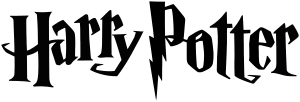

Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people)....
###########################################



In [ ]:
from IPython.display import display
from io import BytesIO
from PIL import Image
import requests

sparql = SPARQLWrapper('https://dbpedia.org/sparql')

# idx: 0 => nouns, 1 => adjectives, 2 => verbs 
idx = 0
query_subjects = subjects_list[idx]

for subject in query_subjects:
    if len(subject.split()) > 1:
      splitted = subject.split()
      subject = ""
      for x in range(0, len(splitted)):
        subject += splitted[x] + "_"
      subject = subject[:-1]
    if len(subject.split("'")) > 1:
      subject = subject.split("'")[0]
    sparql.setQuery(f'''
    SELECT ?name ?comment ?image
    WHERE {{ dbr:{subject} rdfs:label ?name.
             dbr:{subject} rdfs:comment ?comment.
             dbr:{subject} dbo:thumbnail  ?image.
    
        FILTER (lang(?name) = 'en')
        FILTER (lang(?comment) = 'en')
    }}
    ''')

    sparql.setReturnFormat(JSON)
    qres = sparql.query().convert()
    
    if len(qres['results']['bindings']) > 0:
      print('###########################################')
      result = qres['results']['bindings'][0]
      name, comment, image_url = result['name']['value'], result['comment']['value'], result['image']['value']

      print(name)
      try:
        response = requests.get(image_url)
        display(Image.open(BytesIO(response.content)))
      except:
        print("")
      print(f'{comment}...')
      print('###########################################')
      print("")


# Extract Word Meanings

In [ ]:
# idx: 0 => nouns, 1 => adjectives, 2 => verbs 
idx = 0
wm_subjects = subjects_list[idx]

for subject in wm_subjects:
  if len(subject.split()) > 1:
      splitted = subject.split()
      subject = ""
      for x in range(0, len(splitted)):
        subject += splitted[x] + "_"
      subject = subject[:-1]
  if len(subject.split("'")) > 1:
      subject = subject.split("'")[0]

  syn = wordnet.synsets(subject)
  if len(syn) > 0:
    print(f'''- {subject}:\n\tDefinition: {syn[0].definition()}''', end="")
    if len(syn[0].examples()) > 0:
      print(f'''\n\tExamples: {syn[0]. examples()[:3]}''', end="")
    print()


- boy:
	Definition: a youthful male person
	Examples: ['the baby was a boy', 'she made the boy brush his teeth every night', 'most soldiers are only boys in uniform']
- way:
	Definition: how something is done or how it happens
	Examples: ['her dignified manner', 'his rapid manner of talking', 'their nomadic mode of existence']
- thing:
	Definition: a special situation
	Examples: ['this thing has got to end', 'it is a remarkable thing']
- summer:
	Definition: the warmest season of the year; in the northern hemisphere it extends from the summer solstice to the autumnal equinox
	Examples: ['they spent a lazy summer at the shore']
- holiday:
	Definition: leisure time away from work devoted to rest or pleasure
	Examples: ['we get two weeks of vacation every summer', 'we took a short holiday in Puerto Rico']
- time:
	Definition: an instance or single occasion for some event
	Examples: ['this time he succeeded', 'he called four times', 'he could do ten at a clip']
- year:
	Definition: a perio

# Coreference Resolution

In [1]:
import spacy 
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

In [2]:
def merge_phrases(doc):
    with doc.retokenize() as retokenizer:
        for np in list(doc.noun_chunks):
            attrs = {
                "tag": np.root.tag_,
                "lemma": np.root.lemma_,
                "ent_type": np.root.ent_type_,
            }
            retokenizer.merge(np, attrs=attrs)
    return doc

def merge_punct(doc):
    spans = []
    for word in doc[:-1]:
        if word.is_punct or not word.nbor(1).is_punct:
            continue
        start = word.i
        end = word.i + 1
        while end < len(doc) and doc[end].is_punct:
            end += 1
        span = doc[start:end]
        spans.append((span, word.tag_, word.lemma_, word.ent_type_))
    with doc.retokenize() as retokenizer:
        for span, tag, lemma, ent_type in spans:
            attrs = {"tag": tag, "lemma": lemma, "ent_type": ent_type}
            retokenizer.merge(span, attrs=attrs)
    return doc

doc = nlp(fc)
# Merge noun phrases into one token.
doc = merge_phrases(doc)
# Attach punctuation to tokens
doc = merge_punct(doc)

displacy.render(doc, jupyter=True)

NameError: ignored

# NER Tagging

In [207]:
text_nlp = nlp(fc)
displacy.render(text_nlp, style="ent", jupyter=True)